In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('creditcard.csv')

In [14]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset details

*   Time: No. of seconds elapsed between this txn and the first txn
*   V1-V28: Anonymized features
*   Amount: Transaction Amount
*   Class: The dependent variable.
  1-Fraudulent, 0-otherwise



In [15]:
# Check the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None of the columns have categorical values.
None of the columns have any null values.

In [16]:
# Delete any rows with null values
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
# Scale the features
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

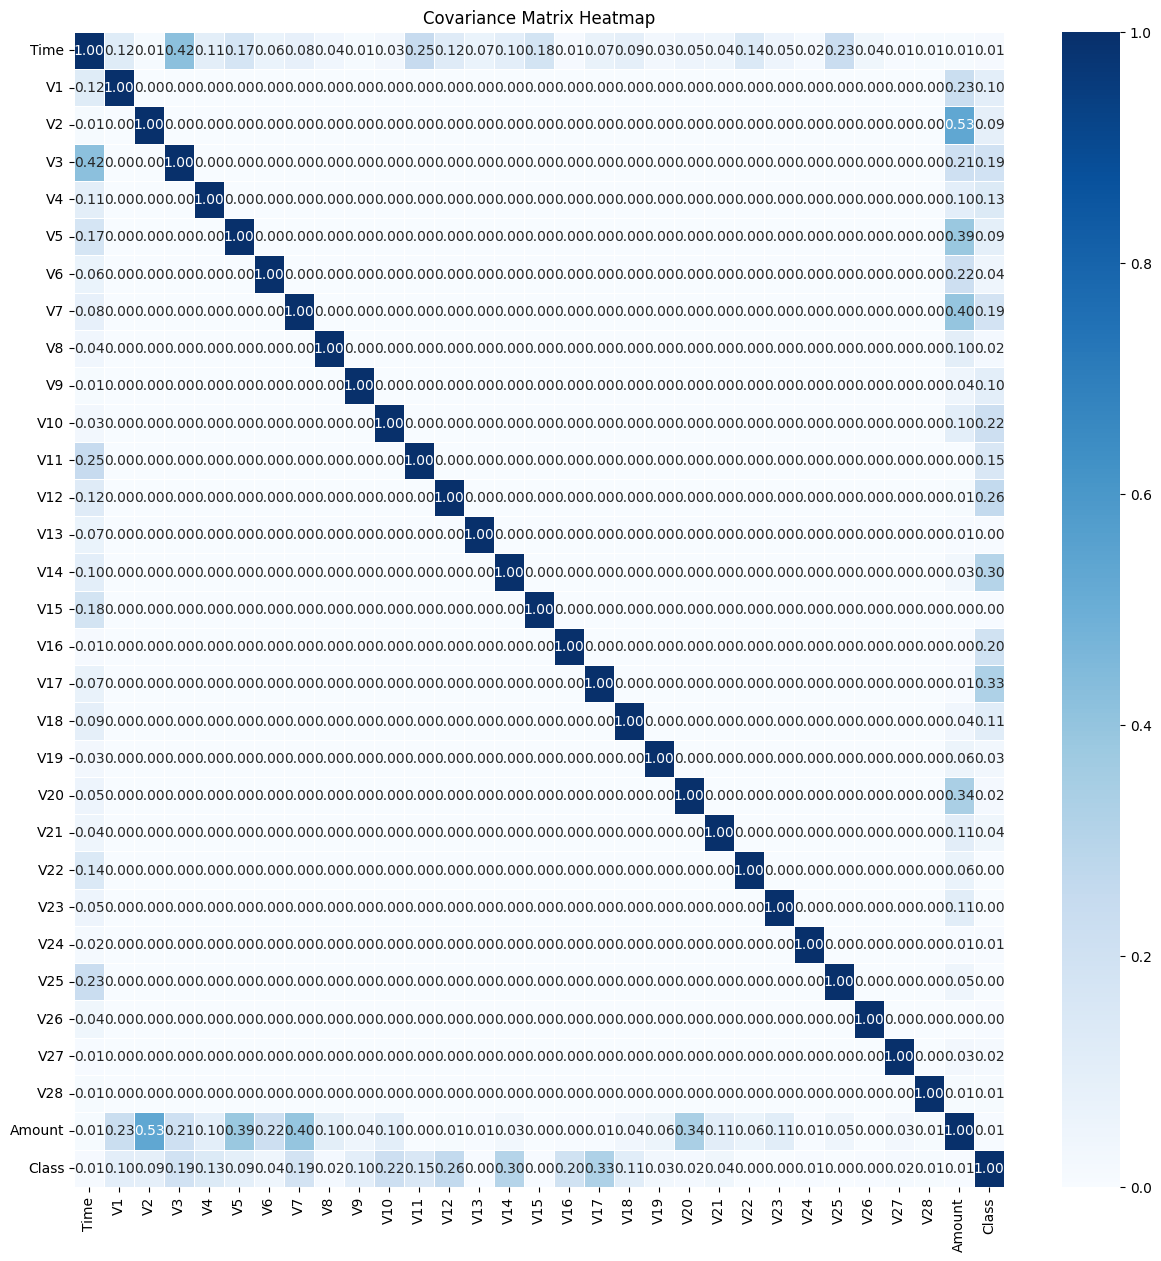

In [18]:
# Find covariance matrix
cov_matrix = abs(df_scaled.cov())

plt.figure(figsize=(15, 15))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [19]:
# As per the cov matrix, Time, V13, V15, V22, V23, V24, V25, V26, V28, Amount have very low (0.01 or lower) variance with the label. We can drop them
drop_cols = ['Time', 'V13', 'V15', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'Amount']

for col in drop_cols:
  df.drop(col, axis=1, inplace=True)

In [20]:
X = df.drop('Class', axis=1)
y = df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# A very simple Decision Tree Classifier
dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)

In [23]:
# Predict using Decision Tree Classifier model
y_pred_dt = dt.predict(X_test)

In [29]:
# Model evaluation

def model_metrics(prediction, model):

  # Model Accuracy, how often is the classifier correct?
  print(f"{model} Accuracy:",metrics.accuracy_score(y_test, prediction))
  print("\n")

  # confusion matrix
  cm= metrics.confusion_matrix(y_test, prediction)
  cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
  cm_dis.plot()
  plt.show()

  classx= metrics.classification_report(y_test, prediction)
  print("\n")
  print(f"{model} Classification Report:\n", classx)

Decision Tree Accuracy: 0.9993084149935629




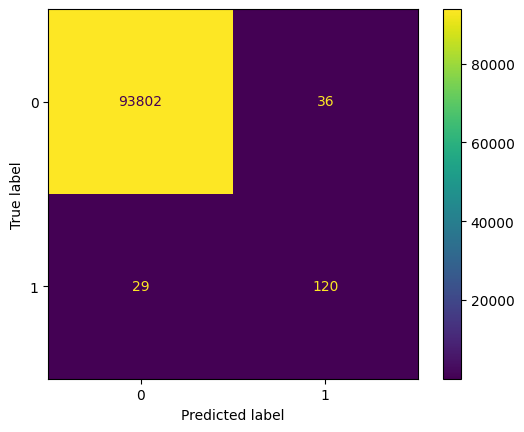



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.77      0.81      0.79       149

    accuracy                           1.00     93987
   macro avg       0.88      0.90      0.89     93987
weighted avg       1.00      1.00      1.00     93987



In [30]:
# Decision Tree Evaluation
model_metrics(y_pred_dt, "Decision Tree")

In [26]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
# Predict using XGBoost Classifier
y_pred_xgb = xgb.predict(X_test)

XGBoost Accuracy: 0.9996382478427868




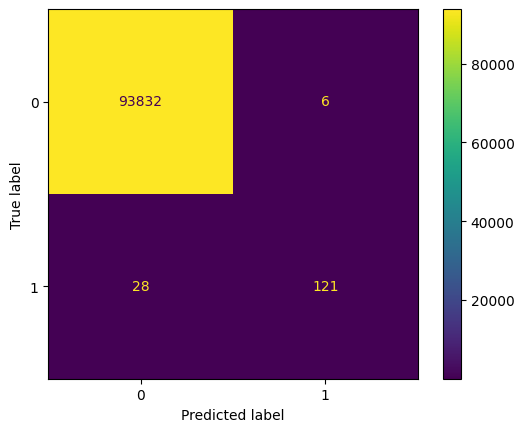



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.95      0.81      0.88       149

    accuracy                           1.00     93987
   macro avg       0.98      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987



In [28]:
# XGBoost Evaluation
model_metrics(y_pred_xgb, "XGBoost")